In [11]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram


In [28]:
#prepare quantum and classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
#prepare quantum circuit
groverCircuit = QuantumCircuit(qr,cr)
#initialize quantum circuit
groverCircuit.h(qr)


In [3]:
#Oracle for |w> = |00> ; formed from Inverted cz gate (X-CZ-X)
groverCircuit.x(qr)
groverCircuit.cz(qr[0],qr[1])  #controlled qubit is q0 and target qubit is q1
groverCircuit.x(qr)
# apply H gate
groverCircuit.h(qr)


In [13]:
#Oracle for |w> =  |11> ; formed from a CZ gate (CZ)
groverCircuit.cz(qr[0],qr[1])
# apply H gate
groverCircuit.h(qr)

In [24]:
#Oracle for |w> =  |01> ; formed from a X-pe-bitul-0 + CZ +  X-pe-bitul-0 gate (X0-CZ-X0)
groverCircuit.x(qr[0])
groverCircuit.cz(qr[0],qr[1])
groverCircuit.x(qr[0])
# apply H gate
groverCircuit.h(qr)

In [29]:
#Oracle for |w> =  |10> ; formed from a X-pe-bitul-1 + CZ +  X-pe-bitul-1 gate (X1-CZ-X1)
groverCircuit.x(qr[1])
groverCircuit.cz(qr[0],qr[1])
groverCircuit.x(qr[1])
# apply H gate
groverCircuit.h(qr)

In [30]:
#Inversion Us (called in fact reflection Us)
groverCircuit.z(qr)
groverCircuit.cz(qr[0],qr[1])
#apply H gate
groverCircuit.h(qr)


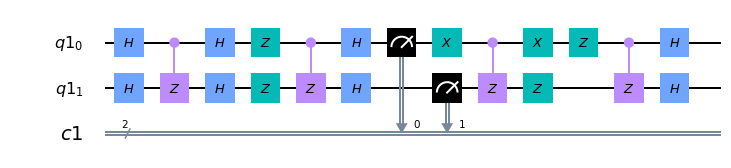

In [20]:
groverCircuit.draw(output="mpl")


In [31]:
#run on simulator
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)


[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


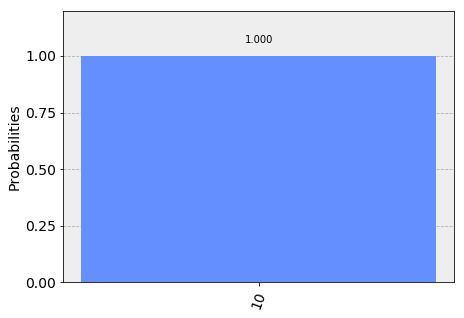

In [32]:
#measure and plot histogram
groverCircuit.measure(qr,cr)

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)


In [33]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)


/root/anaconda3/envs/qisenv/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


Running on current least busy device:  ibmq_burlington


In [34]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(groverCircuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)


Job Status: job has successfully run


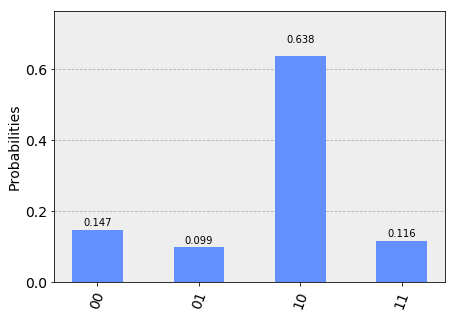

In [35]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)
